## pandasのデータ構造
* Series(シリーズ)
    * 一次元のデータ構造
* DataFrame(データフレーム)
    * 二次元のデータ構造
    * 使うのはほとんどこれ
* 階層インデックス
    * より高次元のデータを扱うとき
    
## 文言について

* インデックス : 行
* カラム : 列
* 行番号 : 数値のインデックス
* 列番号 : 数値のカラム
* 行ラベル : 文字列のインデックス
* 列ラベル : 文字列のカラム

## データフレームの作成(初期化)

pandasをロードし、pdという名前でアクセスできるようにする
```
import pandas as pd
```

* データフレームとして扱いたいデータを `pd.DataFrame` に渡す
    * 戻り値はデータフレームのオブジェクト

In [1]:
import pandas as pd
%matplotlib inline

### データフレームの作成の基本

* 1列のみ

In [2]:
df = pd.DataFrame([1,2,3])
df

,0
0,1
1,2
2,3


* columnsで列名を指定する

In [6]:
df = pd.DataFrame([1,2,3], columns=['value'])
df

,value
0,1
1,2
2,3


### データフレームにタプルのリストを渡す

* 複数列作成する場合
    * <font color="red">列名はcolumnsで指定する</font>

* リストの中にタプルを入れて渡すと行に値が入る

In [5]:
df = pd.DataFrame([(1,2,3)])
df

,0,1,2
0,1,2,3


* columonsで列名を指定する

In [6]:
df = pd.DataFrame([(1,2,3)], columns=['value1','value2','value3'])
df

,value1,value2,value3
0,1,2,3


In [7]:
pd.DataFrame([('apple',160),('orange',30),('kiwi',80)], columns=['name', 'price'])

,name,price
0,apple,160
1,orange,30
2,kiwi,80


In [9]:
data = [
    ('apple',160,'red'),
    ('orange',30,'orange'),
    ('kiwi',80,'green')
]

pd.DataFrame(data, columns=['name', 'price','color'])

,name,price,color
0,apple,160,red
1,orange,30,orange
2,kiwi,80,green


### データフレームにディクショナリのリストを渡す

* 複数列作成する場合
    * <font color="red">列名はディクショナリのキーで指定する</font>

In [8]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

pd.DataFrame(data)

,fruit,order,price
0,apple,12,160
1,orange,30,30
2,kiwi,8,80


## CSVから読み込む

* ヘッダの指定が無い場合は1行目がヘッダ(列名)となる
    * header = None をつけると自動的に数字のヘッダが割り振られる

In [7]:
import csv

data_list = []
for i in range(1,5):
    data = [h + str(i) for h in "ABC"]
    #print(data)
    data_list.append(data)
print(data_list)

with open('csv/test.csv', mode='w', encoding='utf-8') as fp:
    csv_write = csv.writer(fp, lineterminator="\n")
    csv_write.writerows(data_list)

[['A1', 'B1', 'C1'], ['A2', 'B2', 'C2'], ['A3', 'B3', 'C3'], ['A4', 'B4', 'C4']]


In [10]:
%%bash
cat csv/test.csv

A1,B1,C1
A2,B2,C2
A3,B3,C3
A4,B4,C4


In [13]:
df = pd.read_csv("csv/test.csv", header = None)
print(df)

    0   1   2
0  A1  B1  C1
1  A2  B2  C2
2  A3  B3  C3
3  A4  B4  C4


## CSVに書き込む

In [6]:
data = [
    ('apple',160,'red'),
    ('orange',30,'orange'),
    ('kiwi',80,'green')
]

df = pd.DataFrame(data, columns=['name', 'price','color'])
df = df.set_index('name')
df.to_csv('csv/write_csv.csv')

In [7]:
%%bash
cat csv/write_csv.csv

name,price,color
apple,160,red
orange,30,orange
kiwi,80,green


## 後から列を追加する

### データフレーム内の演算結果を追加

In [27]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
df['total'] = df['order'] * df['price']
df

,fruit,order,price,total
0,apple,12,160,1920
1,orange,30,30,900
2,kiwi,8,80,640


### 別のデータフレームと結合

* 「pandas_join.ipynb」を参照

## データフレーム列の型を調べる

In [21]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

pd.DataFrame(data).dtypes

fruit    object
order     int64
price     int64
dtype: object

In [20]:
pd.DataFrame(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
fruit    3 non-null object
order    3 non-null int64
price    3 non-null int64
dtypes: int64(2), object(1)
memory usage: 152.0+ bytes


## インデックス

### インデックスを指定する

* デフォルトは行の検索は0から始まる数値
    * 任意の値をインデックスにセットできる

In [18]:
data = {
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data, index=['apple', 'orange', 'kiwi'])
df

,order,price
apple,12,160
orange,30,30
kiwi,8,80


### 特定の列をインデックスにする

In [17]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
df = df.set_index('fruit')
df

,order,price
fruit,,
apple,12,160
orange,30,30
kiwi,8,80


In [11]:
data = {
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data, index=['apple', 'orange', 'kiwi'])
df.ix['kiwi']

order     8
price    80
Name: kiwi, dtype: int64

In [21]:
data = {
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data, index=['apple', 'orange', 'kiwi'])
df.shape

(3, 2)

## インデックスとカラムを指定する

In [29]:
%%bash
cat csv/test.csv
echo "------------------"
cat csv/test2.csv

A1,B1,C1
A2,B2,C2
A3,B3,C3
A4,B4,C4
------------------
row_name,col_0,col_1,col_2
row_0,A1,B1,C1
row_1,A2,B2,C2
row_2,A3,B3,C3
row_3,A4,B4,C4


### ヘッダや列名の無いデータでインデックスとカラムを指定

* ヘッダ行が無いのでheader = Noneとしている


In [20]:
df = pd.read_csv("csv/test.csv", header = None)
df2 = pd.read_csv("csv/test.csv", header = None)

df2.index = ["row_0", "row_1", "row_2", "row_3"]
df2.columns = ["col_0", "col_1", "col_2"]

print(df)
print(df2)

    0   1   2
0  A1  B1  C1
1  A2  B2  C2
2  A3  B3  C3
3  A4  B4  C4
      col_0 col_1 col_2
row_0    A1    B1    C1
row_1    A2    B2    C2
row_2    A3    B3    C3
row_3    A4    B4    C4


### ヘッダ行と任意の列でインデックスとカラムを指定

In [38]:
df = pd.read_csv("csv/test2.csv")
df1 = df.set_index("row_name")
df2 = df.set_index("col_1")

print(df1)
print(df2)

# indexをリセット
print(df2.reset_index())

         col_0 col_1 col_2
row_name                  
row_0       A1    B1    C1
row_1       A2    B2    C2
row_2       A3    B3    C3
row_3       A4    B4    C4
      row_name col_0 col_2
col_1                     
B1       row_0    A1    C1
B2       row_1    A2    C2
B3       row_2    A3    C3
B4       row_3    A4    C4
  col_1 row_name col_0 col_2
0    B1    row_0    A1    C1
1    B2    row_1    A2    C2
2    B3    row_2    A3    C3
3    B4    row_3    A4    C4


## データフレームの構造確認

In [12]:
df = pd.read_csv("csv/test.csv", header = None)

df.index = ["row_0", "row_1", "row_2", "row_3"]
df.columns = ["col_0", "col_1", "col_2"]
print(df)

# 行名
print(df.index)

# 列名
print(df.columns)

# 行数
print(len(df))

# 列数
print(len(df.columns))

# 行・列数
print(df.shape)

# 要素数
print(df.size)

# メモリ使用量
print(df.memory_usage())

      col_0 col_1 col_2
row_0    A1    B1    C1
row_1    A2    B2    C2
row_2    A3    B3    C3
row_3    A4    B4    C4
Index(['row_0', 'row_1', 'row_2', 'row_3'], dtype='object')
Index(['col_0', 'col_1', 'col_2'], dtype='object')
4
3
(4, 3)
12
Index    32
col_0    32
col_1    32
col_2    32
dtype: int64


## データフレームの内部データとリスト化

* データフレーム -> ndarray -> リスト
    * valuesメソッド
        * データフレームからndarrayを取得する
            * データフレームは単純な値以外の情報も持っているのでndarrayより容量が大きい
* リスト -> データフレーム
* ndarray -> データフレーム
    * dataframeメソッド
        * indexとcolumnsも指定できる

In [32]:
df = pd.read_csv("csv/test.csv", header = None)

df.index = ["row_0", "row_1", "row_2", "row_3"]
df.columns = ["col_0", "col_1", "col_2"]

nd_ary = df.values
nd_ary_to_list = df.values.tolist()

print(df)
print(nd_ary)
print(nd_ary_to_list)

print("------------------")
print(df.memory_usage())
print(nd_ary.nbytes)

print("------------------")
list_to_df = pd.DataFrame(nd_ary_to_list)
nd_ary_to_df = pd.DataFrame(nd_ary)
print(list_to_df)
print(nd_ary_to_df)

print("------------------")
list_to_df_with_index_col = pd.DataFrame(nd_ary_to_list, index = ["row_0", "row_1", "row_2", "row_3"], columns = ["col_0", "col_1", "col_2"])
print(list_to_df_with_index_col)

      col_0 col_1 col_2
row_0    A1    B1    C1
row_1    A2    B2    C2
row_2    A3    B3    C3
row_3    A4    B4    C4
[['A1' 'B1' 'C1']
 ['A2' 'B2' 'C2']
 ['A3' 'B3' 'C3']
 ['A4' 'B4' 'C4']]
[['A1', 'B1', 'C1'], ['A2', 'B2', 'C2'], ['A3', 'B3', 'C3'], ['A4', 'B4', 'C4']]
------------------
Index    32
col_0    32
col_1    32
col_2    32
dtype: int64
96
------------------
    0   1   2
0  A1  B1  C1
1  A2  B2  C2
2  A3  B3  C3
3  A4  B4  C4
    0   1   2
0  A1  B1  C1
1  A2  B2  C2
2  A3  B3  C3
3  A4  B4  C4
------------------
      col_0 col_1 col_2
row_0    A1    B1    C1
row_1    A2    B2    C2
row_2    A3    B3    C3
row_3    A4    B4    C4


## 基本的な統計量の一覧表示

In [36]:
df = pd.read_csv("csv/test.csv", header = None)
df.index = ["row_0", "row_1", "row_2", "row_3"]
df.columns = ["col_0", "col_1", "col_2"]

print(df)
df.describe()

      col_0 col_1 col_2
row_0    A1    B1    C1
row_1    A2    B2    C2
row_2    A3    B3    C3
row_3    A4    B4    C4


,col_0,col_1,col_2
count,4,4,4
unique,4,4,4
top,A3,B4,C3
freq,1,1,1


In [39]:
df = pd.DataFrame([['1', '2', '3', '4'], ['1', '2', '3', '8'], ['9', '10', '11', '12'], ['13', '14', '15', '16']])
df.describe()

,0,1,2,3
count,4,4,4,4
unique,3,3,3,4
top,1,2,3,16
freq,2,2,2,1


# 値の参照

* 単独の値
    * at : 行名、列名を指定して参照
    * iat : 行番号、列番号を指定して参照
* 複数の値
    * loc : 行名、列名の範囲を指定して参照
    * iloc : 行番号、列番号の範囲を指定して参照
        * at, iatと同じように単独の値も取得できる
        * ただし、単独の値の場合はat, iatの方が処理が速い
        

In [4]:
df = pd.read_csv("csv/test.csv", header = None)
df.index = ["row_0", "row_1", "row_2", "row_3"]
df.columns = ["col_0", "col_1", "col_2"]

print(df)

# at
print(df.at["row_0", "col_2"])
print(df.iat[2, 2])

# locで単独の値参照。atより遅いらしい
print(df.loc["row_0", "col_2"])
print(df.iloc[2, 2])

print("------------------------")
# locで範囲指定
## row_0行のcol_1～col_2列の値を参照
print(df.loc["row_0", "col_1":"col_2"])
## row_0とrow_3行のcol_0列の値を参照
print(df.loc[["row_0", "row_3"], "col_0"])

# ilocで範囲指定
print("------------------------")
print(df.iloc[:1, 1:3])
print("------------------------")
print(df.iloc[:2, 1:3])
print("------------------------")
print(df.iloc[:3, 1:3])
print("------------------------")
print(df.iloc[::3, 1:3])

      col_0 col_1 col_2
row_0    A1    B1    C1
row_1    A2    B2    C2
row_2    A3    B3    C3
row_3    A4    B4    C4
C1
C3
C1
C3
------------------------
col_1    B1
col_2    C1
Name: row_0, dtype: object
row_0    A1
row_3    A4
Name: col_0, dtype: object
------------------------
      col_1 col_2
row_0    B1    C1
------------------------
      col_1 col_2
row_0    B1    C1
row_1    B2    C2
------------------------
      col_1 col_2
row_0    B1    C1
row_1    B2    C2
row_2    B3    C3
------------------------
      col_1 col_2
row_0    B1    C1
row_3    B4    C4


## 特定の列や行を取り出す

### 取り出す列名を指定

In [29]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
df[['fruit','order']]

,fruit,order
0,apple,12
1,orange,30
2,kiwi,8


### 先頭行から取り出す行数を指定

In [31]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
df.head(2)

,fruit,order,price
0,apple,12,160
1,orange,30,30


### 最後の行から取り出す行数を指定

In [33]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
df.tail(2)

,fruit,order,price
1,orange,30,30
2,kiwi,8,80


### 取り出す行を範囲で指定

In [40]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
# 1～3行目を表示
df[0:2]

,fruit,order,price
0,apple,12,160
1,orange,30,30


In [47]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
# 2行目以降を表示
df[1:]

,fruit,order,price
1,orange,30,30
2,kiwi,8,80


### サンプル行を取り出す

In [8]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
# ランダムに2行取り出す
df.sample(n=2)

,fruit,order,price
0,apple,12,160
2,kiwi,8,80


### 値を比較して取り出す、適当な値で補完する

In [57]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
df[df.price > 50]

,fruit,order,price
0,apple,12,160
2,kiwi,8,80


In [10]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
# 条件を満たさない行はNaNで表示。実数になる。
df.where(df.price > 50)

,fruit,order,price
0,apple,12.0,160.0
1,NaN,NaN,NaN
2,kiwi,8.0,80.0


In [63]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
# 条件を満たさない行を表示しない
df.where(df.price > 50).dropna()

,fruit,order,price
0,apple,12.0,160.0
2,kiwi,8.0,80.0


In [12]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi', 'banana'],
    'price' : [160,30,80,20],
    'order' : [12,30,8,10]
}

df = pd.DataFrame(data)
# 条件を満たさない行に平均値を入れる
df.where(df.price > 50).fillna(df.mean())

,fruit,order,price
0,apple,12.0,160.0
1,NaN,15.0,72.5
2,kiwi,8.0,80.0
3,NaN,15.0,72.5


In [13]:
data = {
    'fruit' : ['apple', 'orange', 'kiwi'],
    'price' : [160,30,80],
    'order' : [12,30,8]
}

df = pd.DataFrame(data)
# 小文字を大文字にする
df.apply(lambda x: x.fruit.upper(), axis=1)

0     APPLE
1    ORANGE
2      KIWI
dtype: object

## 値の変更

* atやlocを使って値を変更する
* 場合によってはいったんndarryやlistにしてデータフレームに戻した方がやりやすいこともある

In [49]:
df = pd.read_csv("csv/test.csv", header = None)
df.index = ["row_0", "row_1", "row_2", "row_3"]
df.columns = ["col_0", "col_1", "col_2"]

df.iat[0,0] = 'AAA'
df.at['row_1', 'col_2'] = 'BBB'
df.loc['row_2', 'col_0':'col_2'] = 'CCC'
df.iloc[3,[0,2]] = ['DDD', 'EEE']
df

,col_0,col_1,col_2
row_0,AAA,B1,C1
row_1,A2,B2,BBB
row_2,CCC,CCC,CCC
row_3,DDD,B4,EEE


In [61]:
df = pd.read_csv("csv/test.csv", header = None)
df.index = ["row_0", "row_1", "row_2", "row_3"]
df.columns = ["col_0", "col_1", "col_2"]

df.iloc[2:4,1:3] = [['AAA', 'BBB'], ['CCC', 'DDD']]
df

,col_0,col_1,col_2
row_0,A1,B1,C1
row_1,A2,B2,C2
row_2,A3,AAA,BBB
row_3,A4,CCC,DDD


## 並び替える

In [16]:
df = pd.read_csv('csv/ruby_1.csv')
df

,name,ruby,php,python,perl
0,A,100,40,70,80
1,B,60,90,80,10
2,C,90,60,60,60
3,D,80,70,70,80


In [20]:
# ruby行でsortする

## 降順
#sort_by_ruby = df.sort_values(by='ruby', ascending=False)

## 昇順
sort_by_ruby = df.sort_values(by='ruby', ascending=True)
sort_by_ruby[['name', 'ruby']]

,name,ruby
1,B,60
3,D,80
2,C,90
0,A,100


### 計算結果をデータフレームに追加し、並び替える

In [23]:
# 平均値を最後に追加する
#df['mean'] = df.mean(axis=1)
df['mean'] = df.mean(axis=1)
df

,name,ruby,php,python,perl,mean
0,A,100,40,70,80,72.5
1,B,60,90,80,10,60.0
2,C,90,60,60,60,67.5
3,D,80,70,70,80,75.0


In [26]:
# 平均値を降順にsortし、平均値が同じ場合はrubyの点数で降順に並べる
sort_by_mean = df.sort_values(by=['mean','ruby'], ascending=False)
#sort_by_mean = df.sort_values(by='mean', ascending=False)
sort_by_mean[['name', 'mean', 'ruby']]

,name,mean,ruby
3,D,75.0,80
0,A,72.5,100
2,C,67.5,90
1,B,60.0,60


In [34]:
# Pythonを昇順にsortする
#sort_by_mean = df.sort_values(by='python', ascending=True)

# Pythonを昇順にsortし、Pythonが同じ場合はrubyの点数で昇順に並べる
sort_by_mean = df.sort_values(by=['python','ruby'], ascending=True)
sort_by_mean[['name', 'python', 'ruby']]

,name,python,ruby
2,C,60,90
3,D,70,80
0,A,70,100
1,B,80,60


# 時系列データとしてCSVを読み込む

* read_csvはURLを指定するとリモートからデータを取得できる
    * オプション
        * skiprows=n : ヘッダなど、n行飛ばして読み込む
        * index_col=0 : インデックスにしたい列を指定 (ここでは日付列を明示的に指定)
        * parse_dates=True : データ中の日付文字列をパースして日付型に変換してロード

In [8]:
csv_url = 'https://www.mizuhobank.co.jp/rate/market/csv/quote.csv'
df = pd.read_csv(csv_url, skiprows=2, index_col=0, parse_dates=True)
df_pri = df [['USD', 'GBP', 'EUR']]
df_pri.head(3)

#df = pd.read_csv(csv_url)
#df.head(3)

,USD,GBP,EUR
2002-04-01,133.15,189.79,116.12
2002-04-02,133.20,191.78,117.18
2002-04-03,133.20,191.26,116.96


# plotによる可視化

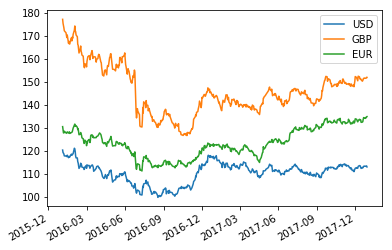

In [9]:
csv_url = 'https://www.mizuhobank.co.jp/rate/market/csv/quote.csv'
df = pd.read_csv(csv_url, skiprows=2, index_col=0, parse_dates=True)
df_pri = df [['USD', 'GBP', 'EUR']]
df_pri['2016':'2017'].plot()

# 時系列データのサンプリング

* サンプリング
    * 時間の精度を別の精度に変換する
* ダウンサンプリング
    * より低い精度に変換する
    
以下はmedianで中央値を取る例

In [4]:
csv_url = 'https://www.mizuhobank.co.jp/rate/market/csv/quote.csv'
df = pd.read_csv(csv_url, skiprows=2, index_col=0, parse_dates=True)
df_pri = df [['USD', 'GBP', 'EUR']]
df_pri.resample('M').median().tail(3)

,USD,GBP,EUR
2017-01-31,114.700,141.280,122.070
2017-02-28,113.075,141.510,120.290
2017-03-31,113.645,139.485,120.625


diffでひとつ前のデータと差分を取る

In [7]:
csv_url = 'https://www.mizuhobank.co.jp/rate/market/csv/quote.csv'
df = pd.read_csv(csv_url, skiprows=2, index_col=0, parse_dates=True)
df_pri = df [['USD', 'GBP', 'EUR']]
df_pri.resample('M').median().diff().tail(3)

,USD,GBP,EUR
2017-01-31,-1.830,-3.290,-0.300
2017-02-28,-1.625,0.230,-1.780
2017-03-31,0.570,-2.025,0.335


pct_changeで変化率を得る

In [10]:
csv_url = 'https://www.mizuhobank.co.jp/rate/market/csv/quote.csv'
df = pd.read_csv(csv_url, skiprows=2, index_col=0, parse_dates=True)
df_pri = df [['USD', 'GBP', 'EUR']]
df_pri.resample('M').median().pct_change().tail(3)

,USD,GBP,EUR
2017-01-31,-0.015704,-0.022757,-0.002452
2017-02-28,-0.014167,0.001628,-0.014582
2017-03-31,0.005041,-0.014310,0.002785


* rollingで移動する窓関数を使う
    * 移動する窓関数
        * 30日間など特定の期間をデータを切り出したものを窓と見立てる
        * 窓に対して最小値や最大値などの集約関数を計算する機能
    * 移動平均の計算に使える

In [1]:
import matplotlib.pyplot as plt

csv_url = 'https://www.mizuhobank.co.jp/rate/market/csv/quote.csv'
df = pd.read_csv(csv_url, skiprows=2, index_col=0, parse_dates=True)
plt.plot(df[['USD', 'GBP', 'EUR']])
plt.plot(df[['USD', 'GBP', 'EUR']].rolling(window=250).mean())
plot.show()

NameError: name 'pd' is not defined

# データベースからの読み込み

In [73]:
import MySQLdb
import pandas.io.sql as mysql

### DB接続
con = MySQLdb.connect(database='webmail', host='10.136.3.175', user='joruri', passwd='pass', charset='utf8')
sql = "show tables"

### pandasのDataFrameの形でデータを取り出す
df = mysql.read_sql(sql, con) 
print (df.head(5))
con.close()

    Tables_in_webmail
0       article_areas
1  article_attributes
2  article_categories
3        article_docs
4    article_sections


In [74]:
import MySQLdb
import pandas.io.sql as mysql
con = MySQLdb.connect(database='webmail', host='10.136.3.175', user='joruri', passwd='pass', charset='utf8')
gw_webmail_mailboxes = mysql.read_sql("select * from gw_webmail_mailboxes;", con) 

### idとstateが同じものの数をカウント
#print (df[['id','state','name_en']].groupby(['id', 'state']).count().head(5))

### nameとsort_noを1セット(集計をしない列)としてid(集計対象の列)の数をカウント
state_disabled_enabled = (gw_webmail_mailboxes[['id','name','sort_no']].groupby(['name','sort_no']).count())
#state_disabled_enabled.head(5)

### idの数が多い順でsort
state_disabled_enabled.sort_values(by='id', ascending=False).head(10)

id
name     sort_no      
INBOX    1        4498
Drafts   3        3745
Star     2        3745
Sent     4        3745
Archives 5        3740
Trash    6        3645
         7         243
Sent     5         213
Archives 6         213
Drafts   4         213

# データフレームのマージ

In [10]:
import MySQLdb
import pandas.io.sql as mysql
con = MySQLdb.connect(database='webmail', host='10.136.3.175', user='joruri', passwd='pass', charset='utf8')
sys_users = mysql.read_sql("select * from sys_users;", con) 
#sys_users.head(3)
sys_groups = mysql.read_sql("select * from sys_groups;", con) 
#sys_groups.head(3)
sys_users_groups = mysql.read_sql("select * from sys_users_groups;", con) 
#sys_users_groups.head(3)

### sys_usersとsys_users_groupsをidとuser_idが一致する行で内部結合
sys_users_sys_users_groups = pd.merge(sys_users, sys_users_groups, left_on='id', right_on='user_id', how='inner')
#sys_users_sys_users_groups.head(3)

### 上記の結果に対して、toup_idとsys_groupsのidが一致する行で内部結合
sys_users_sys_users_groups_sys_groups = pd.merge(sys_users_sys_users_groups, sys_groups, left_on='group_id', right_on='id', how='inner')
sys_users_sys_users_groups_sys_groups.head(3)

### ユーザ名とグループを表示
#sys_users_sys_users_groups_sys_groups[['name_x','name_y']].head(10)


ImportError: No module named 'MySQLdb'

# グループ集計

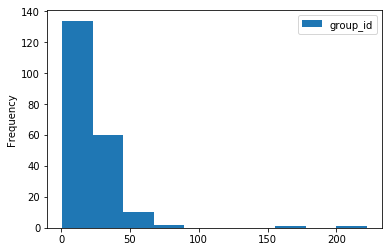

In [76]:
import MySQLdb
import pandas.io.sql as mysql

### 全ての列を表示するためのオプション
#pd.options.display.max_columns = None

con = MySQLdb.connect(database='webmail', host='10.136.3.175', user='joruri', passwd='pass', charset='utf8')
sys_users = mysql.read_sql("select * from sys_users;", con) 
sys_groups = mysql.read_sql("select * from sys_groups;", con) 
sys_users_groups = mysql.read_sql("select * from sys_users_groups;", con) 
sys_users_sys_users_groups = pd.merge(sys_users, sys_users_groups, left_on='id', right_on='user_id', how='inner')
sys_users_sys_users_groups_sys_groups = pd.merge(sys_users_sys_users_groups, sys_groups, left_on='group_id', right_on='id', how='inner')

### カラム名を取得(確認)
#sys_users_sys_users_groups_sys_groups.columns
#sys_users_sys_users_groups_sys_groups[['group_id','name_x','name_y']].head(5)

### group_idの数をカウント
group_count = sys_users_sys_users_groups_sys_groups[['group_id','name_y']].groupby(['name_y']).count()

### group_idの数が多い順に表示
#group_count.sort_values(by='group_id', ascending=False).head(5)

### ヒストグラムの表示(グループ数の頻度)
group_count.plot(kind='hist')

# Tips

## 全ての列を表示する

In [89]:
import MySQLdb
import pandas.io.sql as mysql

### 全ての列を表示するためのオプション
pd.options.display.max_columns = None

con = MySQLdb.connect(database='webmail', host='10.136.3.175', user='joruri', passwd='pass', charset='utf8')
sys_users = mysql.read_sql("select * from sys_users;", con) 
sys_groups = mysql.read_sql("select * from sys_groups;", con) 
pd.merge(sys_users, sys_users_groups, left_on='id', right_on='user_id', how='inner').head(1)

,id_x,air_login_id,state,created_at_x,updated_at_x,ldap,ldap_version,auth_no,name,name_en,account,password,mobile_access,mobile_password,email,remember_token,remember_token_expires_at,kana,sort_no,official_position,assigned_job,group_s_name,id_y,created_at_y,updated_at_y,user_id,group_id
0,1,None,enabled,2010-08-19 16:39:05,2016-04-18 21:37:24,0,None,5,システム管理者,,admin,w4#757xf,1.0,1234,admin@192.168.32.243,None,None,None,None,None,None,None,1,2010-08-19 16:39:05,2010-08-19 16:39:05,1,57


## カラム内の表示文字数を増やす

* デフォルトは50
    * 半角文字や全角文字で制限の挙動が違ったりするので都度確認する方がよさげ

In [15]:
import pandas as pd
### 50文字
a='あいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこ'
df = pd.DataFrame([1,a,3])
df

,0
0,1
1,あいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこ
2,3


In [16]:
import pandas as pd
a='あいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあ'
### 51文字
df = pd.DataFrame([1,a,3])
df

,0
0,1
1,あいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかき...
2,3


In [21]:
import pandas as pd
a='あいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあ'

### 52に設定
pd.set_option("display.max_colwidth", 52)

### 51文字
df = pd.DataFrame([1,a,3])
df

,0
0,1
1,あいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあいうえおかきくけこあ
2,3
